# Week 5 Project

**=================================================================**

## Project Description / Business Task

You have recently been appointed as a BI Analyst by a leading retail chain that operates globally, renowned for its diverse product offerings and commitment to customer satisfaction. In order to maintain its competitive edge and optimize business performance, the company is keen on leveraging data-driven insights to enhance sales strategies and operational efficiency.

As a BI Analyst, your primary responsibility is to conduct a comprehensive analysis of the sales performance of the retail chain across different regions and time periods. The objective is to identify key factors influencing sales, including store locations, product hierarchies, and promotional strategies. By delving into the sales data extracted from daily sales records, product hierarchy details, and store information, you will unravel valuable insights that inform strategic decision-making.

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|

product_id - The unique identifier of a product (String)
store_id - The unique identifier of a store (String)
date - Sales date (YYYY-MM-DD)
sales - Sales quantity (Number)
revenue - Daily total sales revenue (Number)
stock - End of day stock quantity (Number)
price - Product sales price (Number)
promo_type_1 - Type of promotion applied on channel 1 (String)
promo_bin_1 - Binned promotion rate for applied promo_type_1 (String)
promo_type_2 - Type of promotion applied on channel 2 (String)
promo_bin_2 - Binned promotion rate for applied promo_type_2
promo_discount_2 - Discount rate for applied promo type 2
promo_discount_type_2 - Type of discount applied


## Data Tasks

### 1) Data Cleaning and Analysis

### 2) Data Querying and Analysis 

### 3) Chart Creation and Regression Analysis

### 4) Data Visualization


## Summary

## Recommendation for Action

**==========================================================================================================**

## Import Libraries

In [1]:
import numpy as np
#from numpy import count_nonzero, median, mean
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
# Import variance_inflation_factor from statsmodels
#from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import Tukey's HSD function
#from statsmodels.stats.multicomp import pairwise_tukeyhsd

import datetime
from datetime import datetime, timedelta, date

import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter

# Use Folium library to plot values on a map.
#import folium

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)
#sns.set(rc={'figure.figsize':(14,10)})

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


**==========================================================================================================**

## Import Data

In [2]:
df = pd.read_csv("salescleaned.csv", parse_dates=["date"])

**==========================================================================================================**

## Data Quick Glance

In [3]:
df.head()

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
0,P0005,S0001,2017-02-01,0.00,0.00,7.00,33.90,PR14,NaN,PR03,NaN,NaN,NaN
1,P0011,S0001,2017-02-01,0.00,0.00,10.00,49.90,PR14,NaN,PR03,NaN,NaN,NaN
2,P0015,S0001,2017-02-01,1.00,2.41,20.00,2.60,PR14,NaN,PR03,NaN,NaN,NaN
3,P0017,S0001,2017-02-01,0.00,0.00,13.00,1.49,PR14,NaN,PR03,NaN,NaN,NaN
4,P0018,S0001,2017-02-01,0.00,0.00,49.00,1.95,PR14,NaN,PR03,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             29999 non-null  object        
 1   store_id               29999 non-null  object        
 2   date                   29999 non-null  datetime64[ns]
 3   sales                  29999 non-null  float64       
 4   revenue                29999 non-null  float64       
 5   stock                  29999 non-null  float64       
 6   price                  29999 non-null  float64       
 7   promo_type_1           29999 non-null  object        
 8   promo_bin_1            3355 non-null   object        
 9   promo_type_2           29999 non-null  object        
 10  promo_bin_2            0 non-null      float64       
 11  promo_discount_2       0 non-null      float64       
 12  promo_discount_type_2  0 non-null      float64       
dtypes

In [5]:
df.dtypes.value_counts()

float64           7
object            5
datetime64[ns]    1
dtype: int64

In [6]:
# Descriptive Statistical Analysis
df.describe(include="all")

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
count,29999,29999,29999,29999.00,29999.00,29999.00,29999.00,29999,3355,29999,0.00,0.00,0.00
unique,242,6,46,NaN,NaN,NaN,NaN,11,5,1,NaN,NaN,NaN
top,P0171,S0001,2017-01-17 00:00:00,NaN,NaN,NaN,NaN,PR14,verylow,PR03,NaN,NaN,NaN
freq,247,9609,772,NaN,NaN,NaN,NaN,26644,1035,29999,NaN,NaN,NaN
first,NaN,NaN,2017-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2017-12-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.44,1.58,15.54,9.51,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,2.37,34.01,24.46,11.59,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.00,0.00,0.00,0.25,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.00,0.00,5.00,2.50,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Descriptive Statistical Analysis
df.describe(include=["int", "float"])

,sales,revenue,stock,price,promo_bin_2,promo_discount_2,promo_discount_type_2
count,29999.00,29999.00,29999.00,29999.00,0.00,0.00,0.00
mean,0.44,1.58,15.54,9.51,NaN,NaN,NaN
std,2.37,34.01,24.46,11.59,NaN,NaN,NaN
min,0.00,0.00,0.00,0.25,NaN,NaN,NaN
25%,0.00,0.00,5.00,2.50,NaN,NaN,NaN
50%,0.00,0.00,9.00,5.90,NaN,NaN,NaN
75%,0.00,0.00,17.00,11.90,NaN,NaN,NaN
max,154.00,3517.20,618.00,114.90,NaN,NaN,NaN


In [8]:
# Descriptive Statistical Analysis
df.describe(include="object")

,product_id,store_id,promo_type_1,promo_bin_1,promo_type_2
count,29999,29999,29999,3355,29999
unique,242,6,11,5,1
top,P0171,S0001,PR14,verylow,PR03
freq,247,9609,26644,1035,29999


In [9]:
df.columns

Index(['product_id', 'store_id', 'date', 'sales', 'revenue', 'stock', 'price', 'promo_type_1', 'promo_bin_1', 'promo_type_2', 'promo_bin_2', 'promo_discount_2', 'promo_discount_type_2'], dtype='object')

In [10]:
df.shape

(29999, 13)

In [11]:
df.isnull().sum()

product_id                   0
store_id                     0
date                         0
sales                        0
revenue                      0
stock                        0
price                        0
promo_type_1                 0
promo_bin_1              26644
promo_type_2                 0
promo_bin_2              29999
promo_discount_2         29999
promo_discount_type_2    29999
dtype: int64

In [12]:
df.fillna(0, inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
0,P0005,S0001,2017-02-01,0.00,0.00,7.00,33.90,PR14,0,PR03,0.00,0.00,0.00
1,P0011,S0001,2017-02-01,0.00,0.00,10.00,49.90,PR14,0,PR03,0.00,0.00,0.00
2,P0015,S0001,2017-02-01,1.00,2.41,20.00,2.60,PR14,0,PR03,0.00,0.00,0.00
3,P0017,S0001,2017-02-01,0.00,0.00,13.00,1.49,PR14,0,PR03,0.00,0.00,0.00
4,P0018,S0001,2017-02-01,0.00,0.00,49.00,1.95,PR14,0,PR03,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,P0514,S0008,2017-01-18,0.00,0.00,2.00,8.90,PR14,0,PR03,0.00,0.00,0.00
29995,P0527,S0008,2017-01-18,0.00,0.00,5.00,1.95,PR14,0,PR03,0.00,0.00,0.00
29996,P0536,S0008,2017-01-18,0.00,0.00,20.00,2.95,PR14,0,PR03,0.00,0.00,0.00
29997,P0543,S0008,2017-01-18,0.00,0.00,28.00,2.50,PR14,0,PR03,0.00,0.00,0.00


### Pivot Tables

In [15]:
pd.pivot_table(data=df, index="store_id", values="sales")

,sales
store_id,
S0001,0.38
S0002,0.68
S0003,0.64
S0004,0.25
S0006,0.25
S0008,0.15


In [16]:
pd.pivot_table(data=df, index="store_id", values="stock")

,stock
store_id,
S0001,15.98
S0002,16.28
S0003,15.39
S0004,14.09
S0006,19.16
S0008,12.33


In [17]:
pd.pivot_table(data=df, index="store_id", values="revenue")

,revenue
store_id,
S0001,1.86
S0002,2.21
S0003,1.72
S0004,0.90
S0006,0.41
S0008,0.41


**==========================================================================================================**

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the crucial process of using summary statistics and graphical representations to perform preliminary investigations on data to uncover patterns, detect anomalies, test hypotheses, and verify assumptions.

**==========================================================================================================**

## Groupby

Most commonly, we use `groupby()` to split the data into groups,this will apply some function to each of the groups (e.g. mean, median, min, max, count), then combine the results into a data structure. For example, let's select the 'VALUE' column and calculate the mean of the gasoline prices per year. First, we specify the 'Year" column, following by the 'VALUE' column, and the `mean()` function.

In [18]:
df.columns

Index(['product_id', 'store_id', 'date', 'sales', 'revenue', 'stock', 'price', 'promo_type_1', 'promo_bin_1', 'promo_type_2', 'promo_bin_2', 'promo_discount_2', 'promo_discount_type_2'], dtype='object')

### Create a bar chart with the consolidated data to display the total sales per store.

In [19]:
df1 = df.groupby(["store_id"], as_index=False)["sales"].sum()
df1

,store_id,sales
0,S0001,3674.99
1,S0002,5537.99
2,S0003,1900.62
3,S0004,1247.00
4,S0006,398.00
5,S0008,389.00


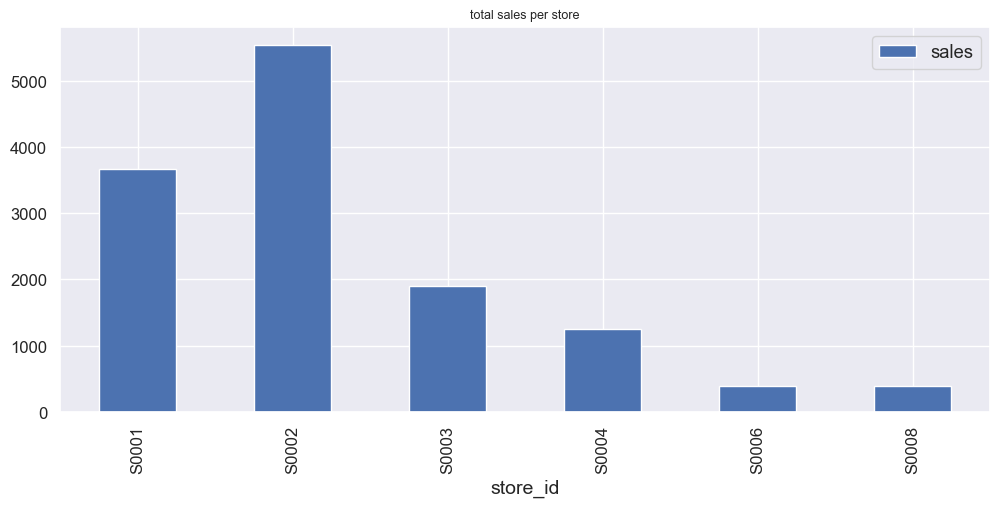

In [20]:
df1.plot(kind = "bar", figsize = (12,5), fontsize = 12, x="store_id", y="sales", title="total sales per store")
plt.show()

### Develop a line chart to visualize how sales trends evolve over a specified timeframe

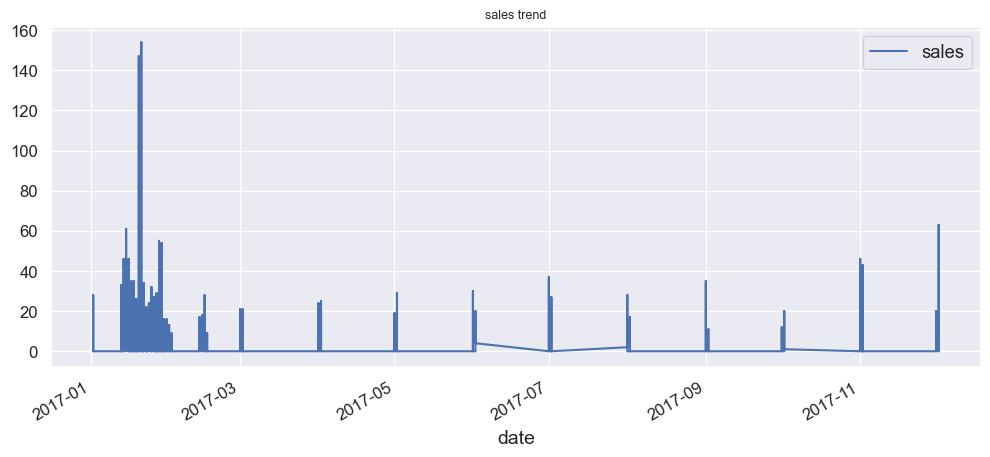

In [21]:
df.plot(kind = "line", figsize = (12,5), fontsize = 12, x="date", y="sales", title="sales trend")
plt.show()

### Perform regression analysis on a subset of data due to Excel's limitations with large datasets

In [22]:
df.head()

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
0,P0005,S0001,2017-02-01,0.00,0.00,7.00,33.90,PR14,0,PR03,0.00,0.00,0.00
1,P0011,S0001,2017-02-01,0.00,0.00,10.00,49.90,PR14,0,PR03,0.00,0.00,0.00
2,P0015,S0001,2017-02-01,1.00,2.41,20.00,2.60,PR14,0,PR03,0.00,0.00,0.00
3,P0017,S0001,2017-02-01,0.00,0.00,13.00,1.49,PR14,0,PR03,0.00,0.00,0.00
4,P0018,S0001,2017-02-01,0.00,0.00,49.00,1.95,PR14,0,PR03,0.00,0.00,0.00


In [23]:
X = df[["revenue", "stock", "price"]]
y = df[["sales"]]

In [24]:
X = sm.add_constant(X)

In [25]:
model = sm.OLS(y, X)

In [26]:
results = model.fit()

In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                 1.058e+04
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        19:27:46   Log-Likelihood:                -57647.
No. Observations:               29999   AIC:                         1.153e+05
Df Residuals:                   29995   BIC:                         1.153e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1356      0.014      9.393      0.000       0.107       0.164
revenue        0.0464      0.000    165.110      0.000       0.046       0.047
stock          0.0222      0.000     56.128      0.000       0.021       0.023
price         -0.0122      0.001    -14.621      0.000      -0.014      -0.011
==============================================================================
Omnibus:                    53228.404   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         92625734.148
Skew:                          12.676   Prob(JB):                         0.00
Kurtosis:                     274.036   Cond. No.                         51.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**==========================================================================================================**

#### Python code done by Dennis Lam